устанавливаем и импортируем нужные библиотеки

In [1]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 14.0 MB/s 


In [ ]:
pip install pyradiomics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 188 kB 8.4 MB/s 
     |████████████████████████████████| 48.4 MB 31 kB/s 
     |████████████████████████████████| 109 kB 45.9 MB/s 
     |████████████████████████████████| 546 kB 47.2 MB/s 


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
import SimpleITK as sitk

In [ ]:
import os

In [ ]:
import pydicom

In [ ]:
import radiomics

In [ ]:
from pydicom import dcmread

откроем и выведем картинки снимка и маски

In [ ]:
# via dcmread from pydicom

ds = dcmread('/content/drive/MyDrive/practice/data/nativ/IMG-0001-00049.dcm')

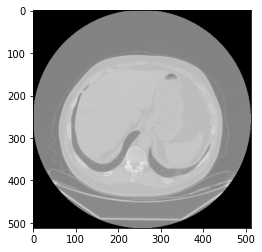

In [ ]:
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

In [ ]:
ds_mask = dcmread('/content/drive/MyDrive/practice/data/liver thing label/IMG0049.dcm')

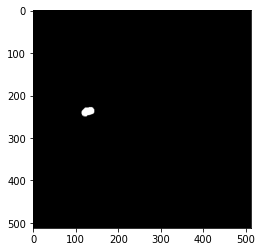

In [ ]:
plt.imshow(ds_mask.pixel_array, cmap=plt.cm.gray)
plt.show()

In [ ]:
# теперь другой вариант, сохранили серии в формате nii.gz, чтобы можно было выбирать слой

image = sitk.ReadImage('/content/drive/MyDrive/practice/data/3 NATIV 1.25 SFT.nii.gz')
segmentation = sitk.ReadImage('/content/drive/MyDrive/practice/data/1 No series description.nii.gz')

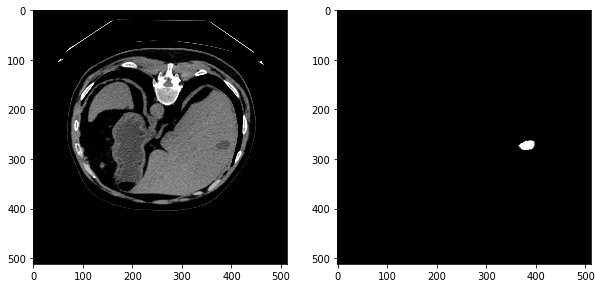

In [ ]:
# number of slice for plotting
z = 180

# window settings
hu_l = -100
hu_h = 200

array_img = sitk.GetArrayFromImage(image)
array_seg = sitk.GetArrayFromImage(segmentation)

I = np.fliplr(np.flipud(array_img[z, :, :]))
S = np.fliplr(np.flipud(array_seg[z, :, :]))

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='gray', vmin=hu_l, vmax=hu_h)
plt.subplot(1, 2, 2)
plt.imshow(S, cmap='gray')
plt.show()

In [ ]:
from radiomics import featureextractor

In [ ]:
extractor = featureextractor.RadiomicsFeatureExtractor('/content/drive/MyDrive/practice/data/exampleCT_config.yaml', preCrop=True)

INFO:radiomics.featureextractor:Loading parameter file /content/drive/MyDrive/practice/data/exampleCT_config.yaml
INFO:radiomics.featureextractor:Applying custom setting overrides: {'preCrop': True}


In [ ]:
extractor.disableAllFeatures()
extractor.disableAllImageTypes()
extractor.enableImageTypeByName('Original')
extractor.enableFeaturesByName(firstorder=['Mean', 'Median', 'StandardDeviation'], shape=['Maximum2DDiameterSlice', 'Maximum2DDiameterColumn', 'Maximum2DDiameterRow', 'MajorAxisLength', 'MinorAxisLength', 'VoxelVolume'])

In [ ]:
extractor.settings

{'additionalInfo': True,
 'binWidth': 16,
 'distances': [1],
 'force2D': False,
 'force2Ddimension': 0,
 'interpolator': 'sitkLinear',
 'label': 1,
 'minimumROIDimensions': 2,
 'minimumROISize': None,
 'normalize': False,
 'normalizeScale': 1,
 'padDistance': 5,
 'preCrop': True,
 'removeOutliers': None,
 'resampledPixelSpacing': [1, 1, 1],
 'resegmentRange': None,
 'voxelArrayShift': 1050}

In [ ]:
result = extractor.execute(image, segmentation, label=1)

INFO:radiomics.featureextractor:Calculating features with label: 1
INFO:radiomics.featureextractor:Loading image and mask
INFO:radiomics.imageoperations:Applying resampling from spacing [0.97070301 0.97070301 1.        ] and size [512 512 231] to spacing [1. 1. 1.] and size [43, 38, 35]
INFO:radiomics.featureextractor:Computing shape
INFO:radiomics.featureextractor:Adding image type "Original" with custom settings: {}
INFO:radiomics.featureextractor:Calculating features for original image
INFO:radiomics.featureextractor:Computing firstorder
Feature StandardDeviation is deprecated, use with caution!


In [ ]:
result

OrderedDict([('diagnostics_Versions_PyRadiomics', 'v3.0.1'),
             ('diagnostics_Versions_Numpy', '1.21.6'),
             ('diagnostics_Versions_SimpleITK', '2.1.1.2'),
             ('diagnostics_Versions_PyWavelet', '1.3.0'),
             ('diagnostics_Versions_Python', '3.7.13'),
             ('diagnostics_Configuration_Settings',
              {'additionalInfo': True,
               'binWidth': 16,
               'distances': [1],
               'force2D': False,
               'force2Ddimension': 0,
               'interpolator': 'sitkLinear',
               'label': 1,
               'minimumROIDimensions': 2,
               'minimumROISize': None,
               'normalize': False,
               'normalizeScale': 1,
               'padDistance': 5,
               'preCrop': True,
               'removeOutliers': None,
               'resampledPixelSpacing': [1, 1, 1],
               'resegmentRange': None,
               'voxelArrayShift': 1050}),
             ('diagnosti